# Decision Tree Classifier on to predict heart attack

**Entropy** is the measurement of degree of randomness. This concept is used to measure **information gain**.Both are the terms more commonly used while classifying. 
**Decision Tree Classifier** has several parameters like criterion(for information gain-entropy, gini for gini impurity),splitter,max_depth,max_features,etc.

In [1]:
# necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# setting layout
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})

In [3]:
# data splitting
from sklearn.model_selection import train_test_split

# accuracy checking
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
d = pd.read_csv('./kaggle/heart.csv')

In [5]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
d.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Data Visualisation

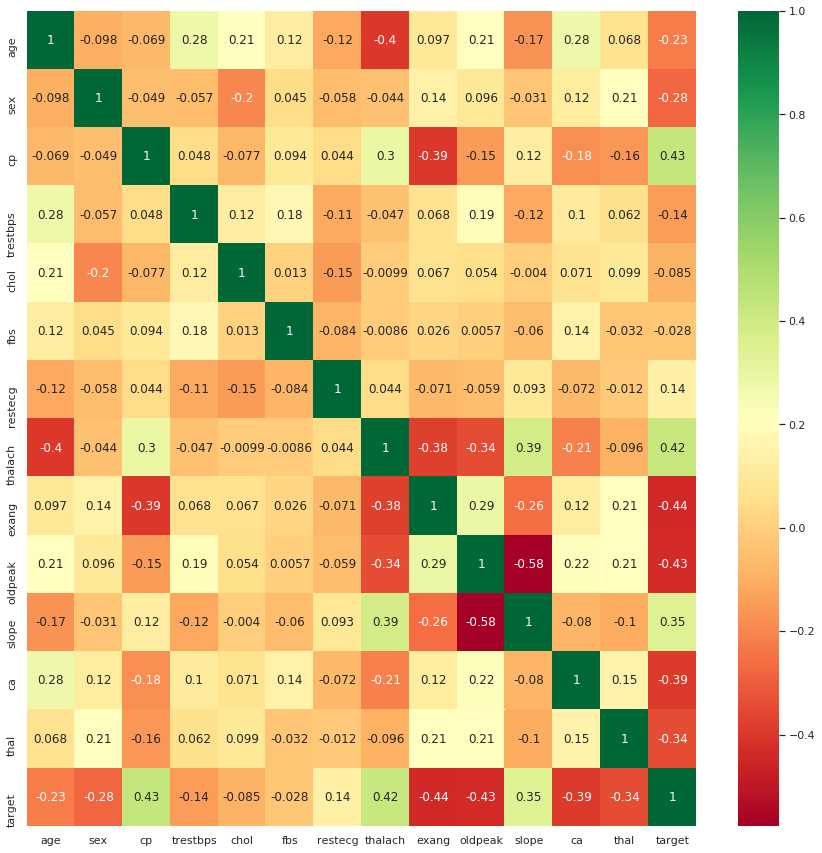

In [8]:
# seeing how every feature correalate with the target
corr = d.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn', annot_kws={"size":12})

In [9]:
X = d.drop('target',axis=1)
y = d['target']

In [10]:
print(X.shape,y.shape)

(303, 13) (303,)


In [11]:
model = DecisionTreeClassifier()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
pred = model.predict(X_test)

# Accuracy Checking

In [33]:
accuracy_score(y_test,pred)

0.8032786885245902

In [34]:
confusion_matrix(y_test, pred)

array([[23,  6],
       [ 6, 26]])

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



# Decision Tree Classifier Hyperparameter Tuning 

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params={
    "criterion":("gini","entropy"),
    "splitter":("best","random"),
    "max_depth":(list(range(1,20)))
    
}

In [38]:
clf_cv = GridSearchCV(model,params,n_jobs=-1,scoring='accuracy',cv=5)

In [39]:
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [40]:
pred=clf_cv.predict(X_test)

# Accuracy Checking

In [41]:
accuracy_score(y_test, pred)

0.819672131147541

In [42]:
confusion_matrix(y_test, pred)

array([[21,  8],
       [ 3, 29]])

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.78      0.91      0.84        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

